In [1]:
include("planet_moon_star_map.jl")
import PyPlot

In [15]:
yplanet = 1.3
y1moon = 1.0
y2moon = 0.5
eps1 = 1e-5
eps2 = 0.0 #no moon
map,bounds = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2) ;

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/10000
Range of grid, y1: 1.284188611699158 1.289502819307071 1.315811388300842 1.3105572639684722
Range of grid, y2: -0.047434164902525694 -0.016995661284574956 0.047434164902525694 0.016995661284574956


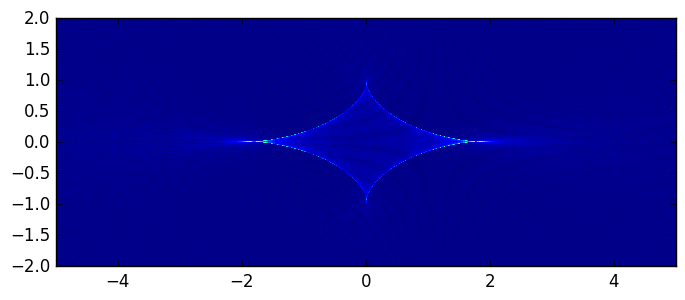

PyObject <matplotlib.image.AxesImage object at 0x31d183d10>

In [16]:
PyPlot.imshow(map, interpolation = "nearest", extent =[bounds[1],bounds[2],bounds[3],bounds[4]])

# We now have our map. Let's convolve it with a finite source kernel. To do that, we'll need a 1000x1000 grid of zeros, with a circular-ish section of 1s. 

In [17]:
function circ_source(r)
    r_scale = r*25.0
    sourcemap = zeros(Float64,size(map))
    xsize = length(sourcemap[1,:])
    ysize = length(sourcemap[:,1])
    xscale = abs(bounds[2]-bounds[1])
    yscale = abs(bounds[4]-bounds[3])
    for i=1:xsize
        for j=1:ysize
            if (((i-xsize/2.0)/xscale)^2.0) + (((j-ysize/2.0)/yscale)^2.0) <= r_scale^2.0
                sourcemap[i,j] = 1
            end
        end
    end
    return sourcemap
end

circ_source (generic function with 1 method)

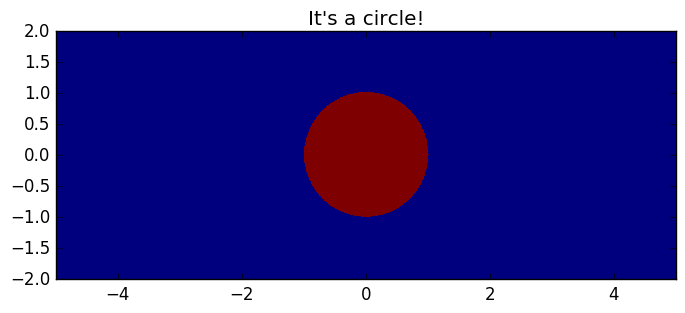

PyObject <matplotlib.text.Text object at 0x31d300f50>

In [18]:
PyPlot.imshow(circ_source(1.0), interpolation = "nearest", extent = [bounds[1],bounds[2],bounds[3],bounds[4]])
PyPlot.title("It's a circle!")

# Proof of concept, let's show what a convolution between a 1 R_E,p source and the lensing map looks like

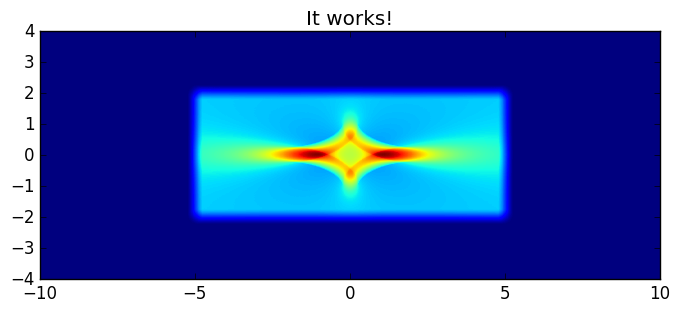

PyObject <matplotlib.text.Text object at 0x31c0a0a90>

In [23]:
conmap = conv2(map,circ_source(0.25))
xsize = length(map[1,:])
ysize = length(map[:,1])
cxsize = length(conmap[1,:])
cysize = length(conmap[:,1])
xratio = cxsize/xsize
yratio = cysize/ysize
PyPlot.imshow(conmap, interpolation = "nearest", extent = [bounds[1]*xratio,bounds[2]*xratio,bounds[3]*yratio,bounds[4]*yratio])
PyPlot.title("It works!")

# Let's do the actual problem

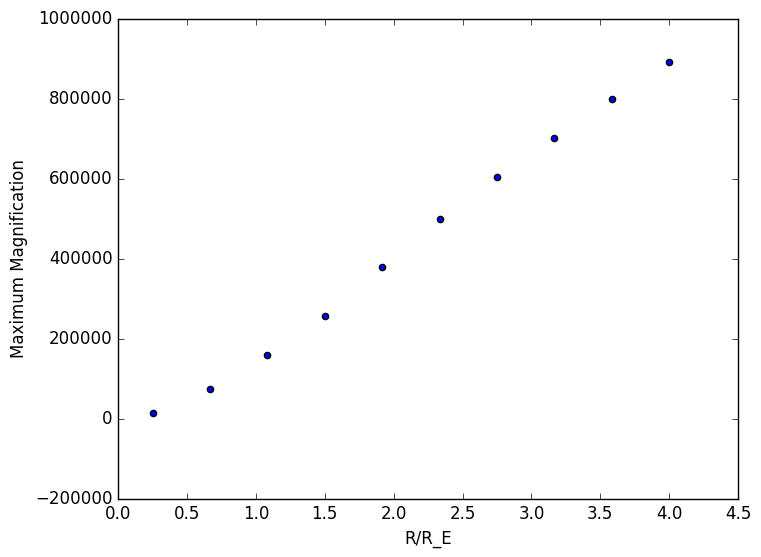

PyObject <matplotlib.text.Text object at 0x31c145c10>

In [25]:
maxamp = Float64[]
rs = linspace(0.25,4,10)

for r in rs
    source = circ_source(r)
    lensmap = conv2(map,source)
    push!(maxamp,maximum(lensmap))
end

PyPlot.scatter(rs,maxamp)

PyPlot.xlabel("R/R_E")
PyPlot.ylabel("Maximum Magnification")